#### Use o comando MATLAB butter para projetar um filtro passa-baixas IIR de quinta ordem, com frequência de corte de 0,6 Hz. Considere que a frequência de amostragem é de 2 Hz. Esboce a magnitude e a fase da resposta em frequência (RF) do filtro. Esboce também o diagrama de polos e zeros (DPZ) e a parte “significativa” da resposta ao impulso do filtro.

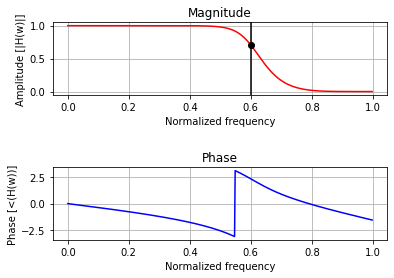

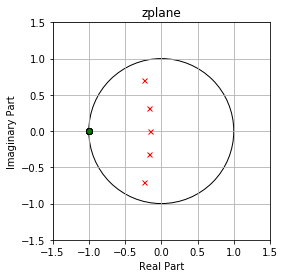

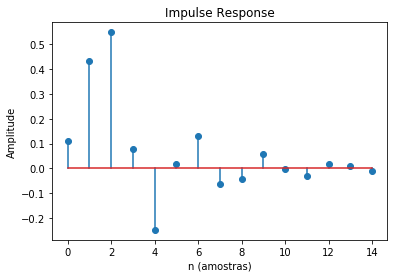

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from zplane import zplane
from pylab import *
from impz import impz


fs = 2
order = 5
cutoff_frequency = 0.6
b, a = signal.butter(order, 2*cutoff_frequency/fs)
# Frequency response
w, h = signal.freqz(b, a)

# Plot
plt.subplot(211)
plt.plot(w/np.pi, abs(h), color='red')
plt.plot(cutoff_frequency, 1/np.sqrt(2), 'ko')
plt.axvline(cutoff_frequency, color='k')
plt.grid(); plt.ylabel("Amplitude [|H(w)|]");
plt.xlabel("Normalized frequency"); plt.title('Magnitude')
_ = subplots_adjust(hspace=1)
plt.subplot(212)
plt.plot(w*fs/(2*np.pi), np.angle(h), color='blue')
plt.grid(); plt.ylabel("Phase [<(H(w))]"); plt.xlabel("Normalized frequency")
plt.title('Phase')
plt.show()

zplane(b,a)

impz(b,a)

#### Na transformação bilinear (TBL), considerando pelo menos três valores de T, esboce em uma mesma figura a relação entre a frequência analógica e a frequência digital.


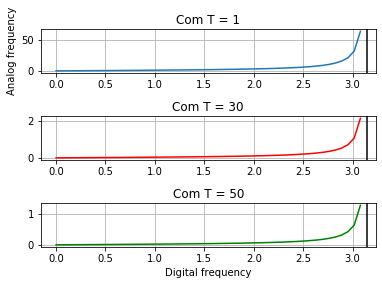

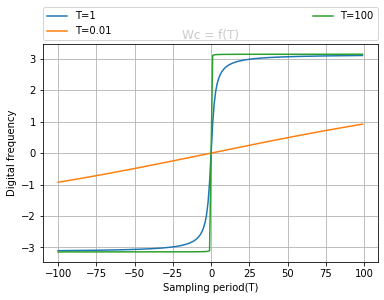

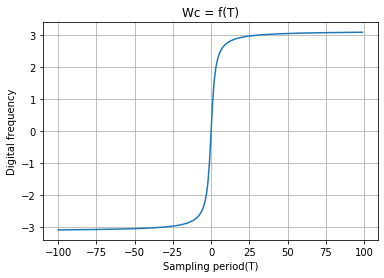

In [4]:
from scipy.signal import bilinear
import numpy as np
import matplotlib.pyplot as plt
from pylab import *



#vetor da frequencia digital
digital_freq = np.linspace(0, np.pi, endpoint=False)

#relacao entre a frequencia analogica e a frequencia digital
def Analog_freq(T):
    analog_freq = (2/T) * np.tan(digital_freq/2)
    return analog_freq

#plot da relacao acima
plt.subplot(311)
plt.plot(digital_freq, Analog_freq(T = 1))
plt.title("Com T = 1")
plt.ylabel("Analog frequency")
plt.axvline(x=np.pi, color='k')
plt.grid()
_ = subplots_adjust(hspace=1)

plt.subplot(312)
plt.plot(digital_freq, Analog_freq(T = 30), color='r')
plt.title("Com T = 30")
plt.axvline(x=np.pi, color='k')
plt.grid()

plt.subplot(313)
plt.plot(digital_freq, Analog_freq(T = 50), color='g')
plt.title("Com T = 50")
plt.xlabel("Digital frequency")
plt.axvline(x=np.pi, color='k')
plt.grid()
plt.show()



#Omega_c = 1
analog_freq = 1

#T = np.arange(-30, 30)
T = np.arange(-100, 100)
def Digital_freq(T,t):
    digital_freq = 2*np.arctan(analog_freq*T*t/2)
    return digital_freq

#ax.plot(a, c, 'k--', label='Model length')
#ax.plot(a, d, 'k:', label='Data length')
#ax.plot(a, c + d, 'k', label='Total message length')

plt.plot(T, Digital_freq(T,1),label='T=1')
plt.plot(T,Digital_freq(T,0.01),label='T=0.01')
plt.plot(T,Digital_freq(T,100),label='T=100')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.ylabel("Digital frequency")
plt.xlabel("Sampling period(T)")
plt.title('Wc = f(T)')
plt.grid()
plt.show()

plt.plot(T, Digital_freq(T,1),label='T=1')
plt.ylabel("Digital frequency")
plt.xlabel("Sampling period(T)")
plt.title('Wc = f(T)')
plt.grid()
plt.show()


#### Use a TBL para projetar um filtro digital de Butterworth passa-baixas de ordem 4 e frequência de corte 8 kHz. Considere uma frequência de amostragem de 40 kHz.


246214.68297402022
[22968.6680448]


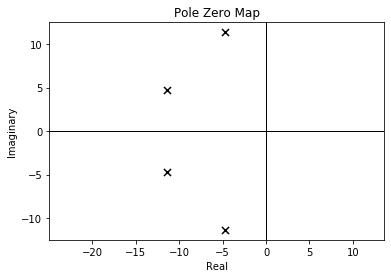

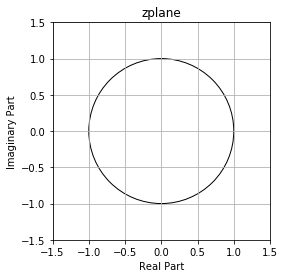

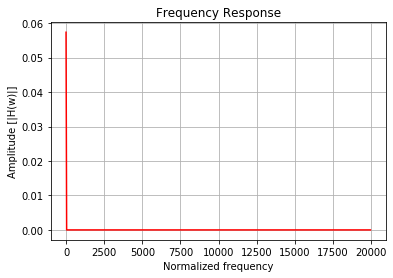

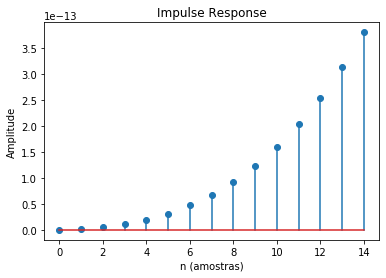

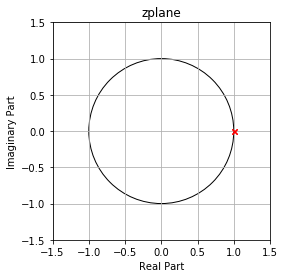

(array([], dtype=float64),
 array([0.99990568+0.00027915j, 0.99990568-0.00027915j,
        0.9996922 +0.0001603j , 0.9996922 -0.0001603j ]),
 0.1667337044254568)

In [8]:
import scipy.signal as ss
import numpy as np
import math as mt
from zplane import zplane
import matplotlib.pyplot as plt
from impz import impz
import control



def butter_lowpass(order, fs, cutoff_frequency):
    nyq = 0.5 * fs
    normal_cutoff = cutoff_frequency / nyq
    # define parameters
    b, a = ss.butter(order, normal_cutoff, btype='lowpass', analog=True)
    return b,a

order = 4
cutoff_frequency = 8000
fs = 40000

#letra a
analog_cutoff_frequency = (2*fs) * mt.tan(2*np.pi*cutoff_frequency/fs)
digital_cutoff_frequency = 2*mt.atan(2*cutoff_frequency/fs)
print(analog_cutoff_frequency)

#letra b
b, a = ss.butter(order, 2*analog_cutoff_frequency/fs, analog=True)
#H(s)
ws, hs = ss.freqs(b, a)
#DPZ
print(b)
H = control.TransferFunction(b, a)
control.pzmap(H)
plt.show()


#letra c
b_z, a_z = ss.bilinear(b, a, fs)
#H(z)
wz, hz = ss.freqz(b_z, a_z)
#Resposta em frequencia
plt.plot(wz*fs/(2*np.pi), abs(hz), color='red')
plt.grid(); plt.ylabel("Amplitude [|H(w)|]"); plt.xlabel("Normalized frequency")
plt.title('Frequency Response')
plt.show()
#Resposta ao impulso
impz(b_z, a_z)
#DPZ
zplane(b_z, a_z)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


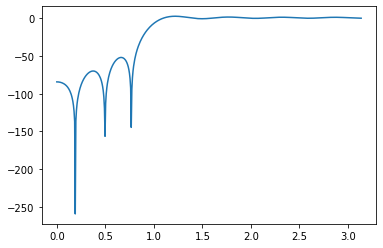

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


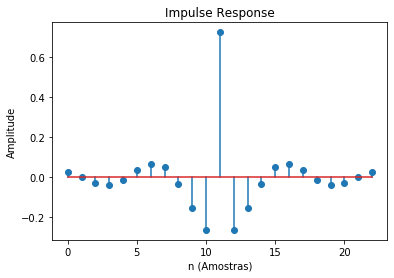

TypeError: dispatcher for __array_function__ did not return an iterable

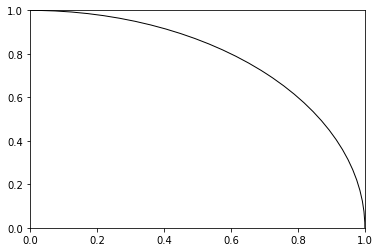

In [5]:
import scipy.signal as ss
from scipy import zeros
from numpy import *
import matplotlib.pyplot as plt
from impz import impz
from pylab import *
from matplotlib.pyplot import *
from zplane import zplane

def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l)
    impulse[0] =1.
    x = arange(0,l)
    response = ss.lfilter(b,a,impulse)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (Amostras)')
    title(r'Impulse Response')
    show()

numtaps = 22
ws = 0.2*np.pi
wp = 0.4*np.pi
wc = (ws + wp)/2

#Retangular
h1 = ss.firwin(numtaps+1, cutoff=0.3, window = 'boxcar', pass_zero=False)
w, h = ss.freqz(h1)
plot(w, 20*log(h))
plt.show()
impz(h1)
zplane(h1, 1)

#Triangular
h1 = ss.firwin(numtaps, cutoff=0.3, window = 'triang', pass_zero=False)
w, h = ss.freqz(h1)
plot(w, 20*log(h))
plt.show()
impz(h1)
zplane(h1, 1)


#Hamming
h1 = ss.firwin(numtaps+1, cutoff=0.3, window = 'hamming', pass_zero=False)
w, h = ss.freqz(h1)
plot(w, 20*log(h))
plt.show()
impz(h1)
zplane(h1, 1)

#Blackman
h1 = ss.firwin(numtaps+1, cutoff=0.3, window = 'blackman', pass_zero=False)
w, h = ss.freqz(h1)
plot(w, 20*log(h))
plt.show()
impz(h1)
zplane(h1, 1)


In [11]:
from scipy import signal
import matplotlib.pyplot as plt

fs = 100
bf = 2 * np.pi * np.array([7, 13])
filts = signal.lti(*signal.butter(4, bf, btype='low', analog=True))
filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
wz, hz = signal.freqz(filtz.num, filtz.den)
ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)

plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)), label=r'$|H(j \omega)|$')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)), label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()

ValueError: Must specify a single critical frequency Wn

0.7265425280053609
58123.40224042887
[1.14131128e+19] [1.00000000e+00 1.51883770e+05 1.15343397e+10 5.13113478e+14
 1.14131128e+19]


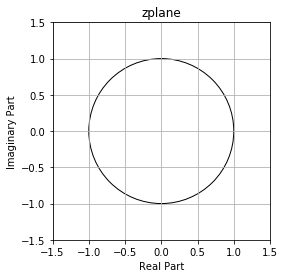

[1.14131128e+19] [1.00000000e+00 1.51883770e+05 1.15343397e+10 5.13113478e+14
 1.14131128e+19]


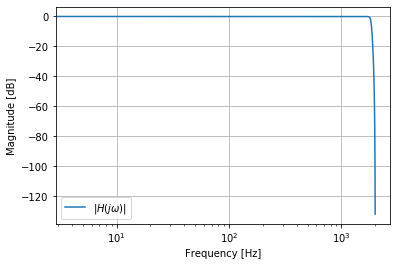

In [49]:

from scipy import signal
import matplotlib.pyplot as plt
#Td = 1/40000;
#f_c= 8000;
#W_c = (2/Td)*(tan((f_c*2*pi*Td)/2))


Fd = 40000
Td=1/Fd

print(tan((8000*2*pi)/(2*Fd)))

W_c=(2*Fd)*(tan((8000*2*pi)/(2*Fd)))
print(W_c)
a,b=signal.butter(4,W_c, btype='lowpass', analog=True)

print(a,b)
zplane(a,b)
filts = signal.lti(*signal.butter(4,W_c, btype='lowpass', analog=True))
filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
wz, hz = signal.freqz(filtz.num, filtz.den)
ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)
print(filts.num,filts.den)

plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-9)), label=r'$|H(j \omega)|$')
#plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)), label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()